# Dynamical stability of isotropic neutron star models

Given a family of neutron star models associated to an EOS, a model with compactness $\beta$ will be stable under small *global* radial adiabatic oscillations if the effective adiabatic index for that model $\langle \gamma \rangle (\beta)$ is higher than or equal to the critical adiabatic index for that model $\gamma_{cr} (\beta)$:

$$ \langle \gamma \rangle (\beta) \geq \gamma_{cr} (\beta) .$$

Where

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

and

\begin{align}
    \gamma_{cr} = \frac{4}{3} +& \frac{1}{36} \frac{\int_{0}^{R} e^{\lambda+3 \mathrm{v}}\left[16 P+\left(e^{\lambda}-1\right)\left(P+\rho \right)\right]\left(e^{\lambda}-1\right) r^{2} d r}{\int_{0}^{R} e^{\lambda+3 \mathrm{v}} P r^{2} d r} \nonumber
    \\ &+ \frac{4 \pi}{9} \frac{\int_{0}^{R} e^{3( \lambda+ \mathrm{v})}\left[8 P+\left(e^{\lambda}+1\right)\left(P+\rho \right)\right] P r^{4} d r}{\int_{0}^{R} e^{\lambda+3 \mathrm{v}} P r^{2} d r}
    \\ & + \frac{16 \pi^{2} }{9} \frac{\int_{0}^{R} e^{5 \lambda+3 v }\left(P+\rho \right) P^{2} r^{6} d r}{\int_{0}^{R} e^{\lambda+3 v } P r^{2} d r}. \nonumber
\end{align}

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib as mpl
from scipy import integrate, interpolate
from Physical_Const import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=21)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend',fontsize= 14,markerscale=1.5)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.linewidth'] = 1.0

In [2]:
def aindex_stab(EOS,k=3,s=0.0):
    # Listing the previously calculated models
    owd=os.getcwd()
    path=os.chdir('results/'+EOS)
    listOfEntries= os.scandir(path)
    models= []
    for entry in listOfEntries:
        if '1' in entry.name:
            models.append(entry.name)
    os.chdir(owd)
    models.sort()
    # Empty strings to save the
    gamma_efs = []
    gamma_crs = []
    rhosc= []
    betas=[]
    for model in models:
        m, P, rho, nu, lambd, r = np.loadtxt('results/'+ EOS +'/' + model ,unpack=True)
        nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
        #drho=interpolate.UnivariateSpline(r, rho, k=k1, s=s1).derivative(n=1)
        #dP=interpolate.UnivariateSpline(r, P, k=k2, s=s2).derivative(n=1)
        dP = -(P+rho)*((m+4*np.pi*P*(r**3))/(r*(r-2*m)))
        rhoEOS,PEOS=np.loadtxt('EOS/'+ EOS + '.dat',usecols=(2,1),unpack=True)
        #gamma = ((rho+P)/P)*(dP(r)/drho(r))
        vs=interpolate.UnivariateSpline(rhoEOS, PEOS, k=3, s=s).derivative(n=1)(rho*rhodim)
        drho = dP/vs
        gamma = (rho+P)/(P)*vs
        gamma_ef = integrate.simps(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.simps(np.exp(lambd+3*nu)*P*(r**2),r)
        t1 = (4/9)*integrate.simps(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2),r)/integrate.simps(np.exp(lambd+3*nu)*P*(r**2),r)
        t2 = (4*np.pi/(9))*integrate.simps(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.simps(np.exp(lambd+3*nu)*P*(r**2),r)
        t3 = ((16*np.pi**2)/(9))*integrate.simps(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.simps(np.exp(lambd+3*nu)*P*(r**2),r)
        gamma_cr = 4/3 + t1 + t2 + t3
        gamma_efs.append(gamma_ef)
        gamma_crs.append(gamma_cr)
        betas.append(2*m[-1]/r[-1])
        rhosc.append(rho[0]*rhodim)
    return [rhosc,betas,gamma_efs,gamma_crs]

In [3]:
rhoscALF1,betasALF1,gamma_efsALF1,gamma_crsALF1 = aindex_stab('wff1')

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [4]:
RALF1,MALF1,rhocALF1=np.loadtxt('results/wff1/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [5]:
beta_chandra = np.amax(MALF1)*Msun*G/(RALF1[np.argmax(MALF1)]*1e+5*c**2)

In [6]:
beta_chandra

0.337343351166438

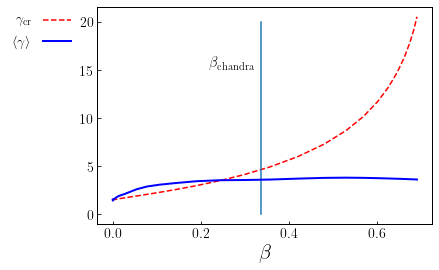

In [12]:
fig, ax = plt.subplots()

plt.plot(betasALF1,gamma_crsALF1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{\rm{cr}}$')

plt.plot([beta_chandra,beta_chandra],[0,20])

plt.plot(betasALF1,gamma_efsALF1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

ax.text(0.22, 15, r'$\beta_{\rm{chandra}}$', fontsize=15)

plt.xlabel(r'$\beta$')
#plt.ylabel(r'$\langle \gamma \rangle$')

#plt.xscale('log')
#plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,4.5)
#plt.xlim(0,0.4)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
l = plt.legend(bbox_to_anchor=(-0.1,0.9), loc="upper left", 
                bbox_transform=fig.transFigure, ncol=1, markerfirst = False,frameon=False)



plt.savefig('AIndexStabALF1_cubic.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

According to Koliogiannis and Moustakidis (2019) $\langle \gamma \rangle$ and $\gamma_{\rm{cr}}$ should meet at $\beta_{\rm{chandra}}$.

### What went wrong?

In order to integrate the TOV equations we interpolated a numerical EOS linearly, this recurrent jumps in the EOS could result on high errors in the numerical integration.

One possible solution is using the widely used piecewise polytropic interpolation, that could smooth abrupt jumps and give better results in the integrals.

Or...

Koliogiannis and Moustakidis (2019) is using better integration techniques, for this we need to check their code.